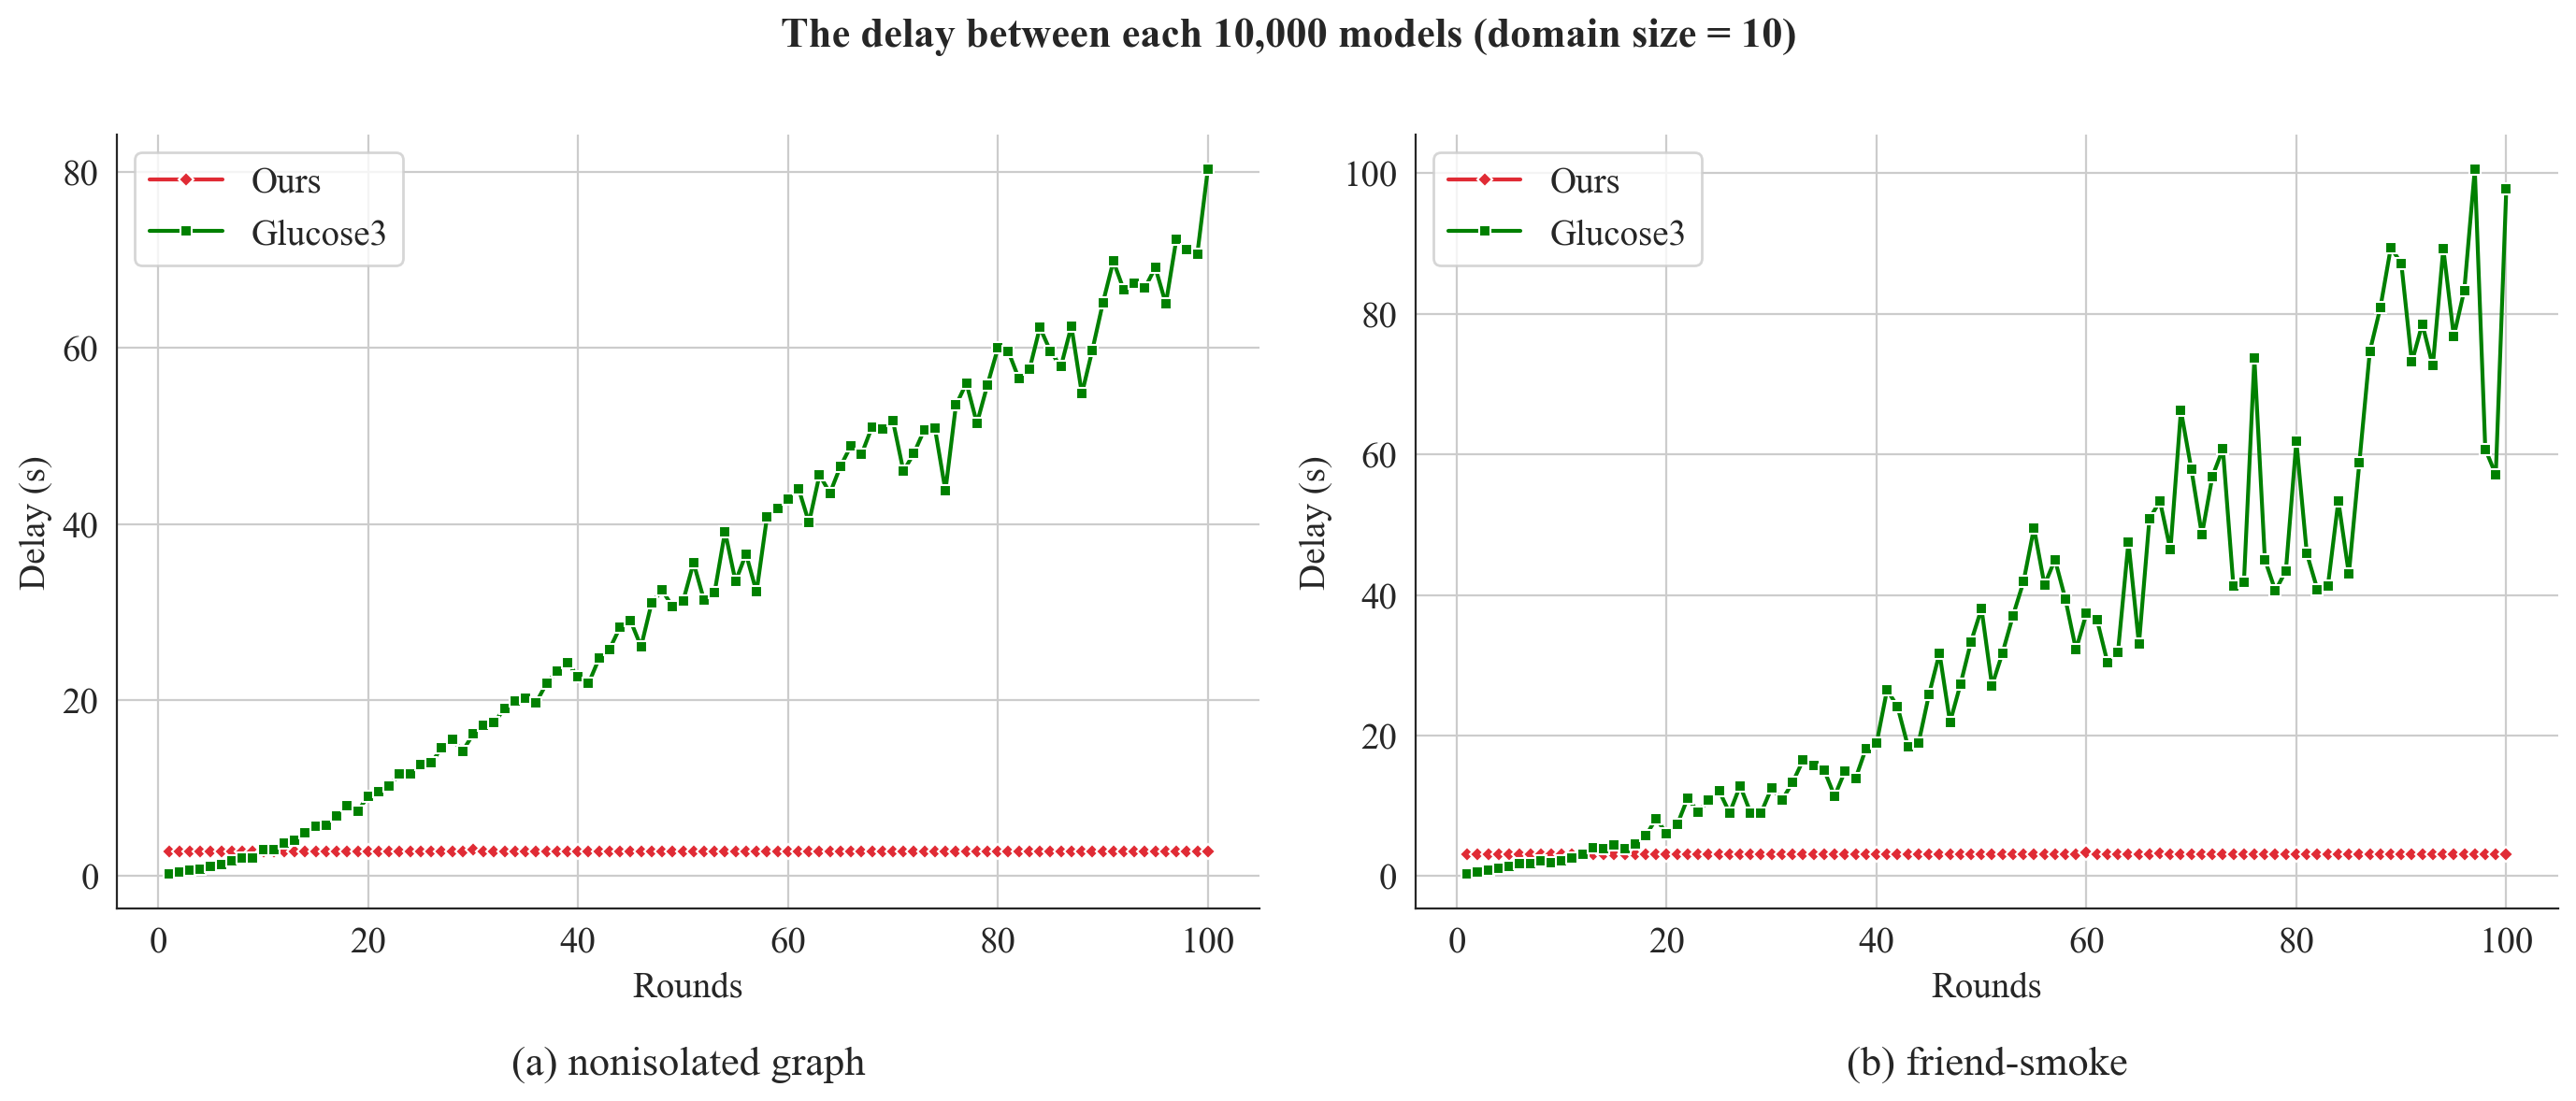

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# 读取数据
def load_data(path1, path2):
    res1 = pd.read_csv(path1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
    res2 = pd.read_csv(path2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
    x = res1['i']
    df1 = pd.DataFrame({'i': x, 'delay': res1['residual']})
    df2 = pd.DataFrame({'i': x, 'delay': res2['residual']})
    return df1, df2

# 数据路径
noniso1_path = "models/enum/noniso-delay"
noniso2_path = "models/enum/pysat-non-iso-delay"
fr1_path = "models/enum/fr-delay"
fr2_path = "models/enum/pysat-fr-sm-delay"

# 加载数据
df_noniso1, df_noniso2 = load_data(noniso1_path, noniso2_path)
df_fr1, df_fr2 = load_data(fr1_path, fr2_path)

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=200)
fig.suptitle('The delay between each 10,000 models (domain size = 10)',
             y=1.00,  # 垂直位置微调
             fontsize=16, 
             fontweight='bold')

# 绘制第一个子图（non-isolated）
sns.lineplot(data=df_noniso1, x='i', y='delay', color='#e02b35', marker='D', markersize=4, label='Ours', ax=ax1)
sns.lineplot(data=df_noniso2, x='i', y='delay', color='green', marker='s', markersize=4, label='Glucose3', ax=ax1)
# ax1.set_title('The delay between each 10,000 models (non-isolated, n=10)')
ax1.set_xticks([0, 20, 40, 60, 80, 100])
ax1.set_yticks(range(0, 81, 20))
ax1.set_xlabel('Rounds')
ax1.set_ylabel('Delay (s)')
ax1.grid(True)

# 绘制第二个子图（fr-sm）
sns.lineplot(data=df_fr1, x='i', y='delay', color='#e02b35', marker='D', markersize=4, label='Ours', ax=ax2)
sns.lineplot(data=df_fr2, x='i', y='delay', color='green', marker='s', markersize=4, label='Glucose3', ax=ax2)
# ax2.set_title('The delay between each 10,000 models (fr-sm, n=10)')
ax2.set_xticks([0, 20, 40, 60, 80, 100])
ax2.set_yticks(range(0, 101, 20))
ax2.set_xlabel('Rounds')
ax2.set_ylabel('Delay (s)')
ax2.grid(True)

ax1.text(0.5, -0.2, '(a) nonisolated graph', transform=ax1.transAxes, ha='center', va='center', fontsize=16)
ax2.text(0.5, -0.2, '(b) friend-smoke', transform=ax2.transAxes, ha='center', va='center', fontsize=16)


# 统一样式
sns.set_style("white")
sns.despine(left=False, bottom=False)
plt.tight_layout()

# 保存合并后的图表
plt.savefig("combined_delay.pdf")

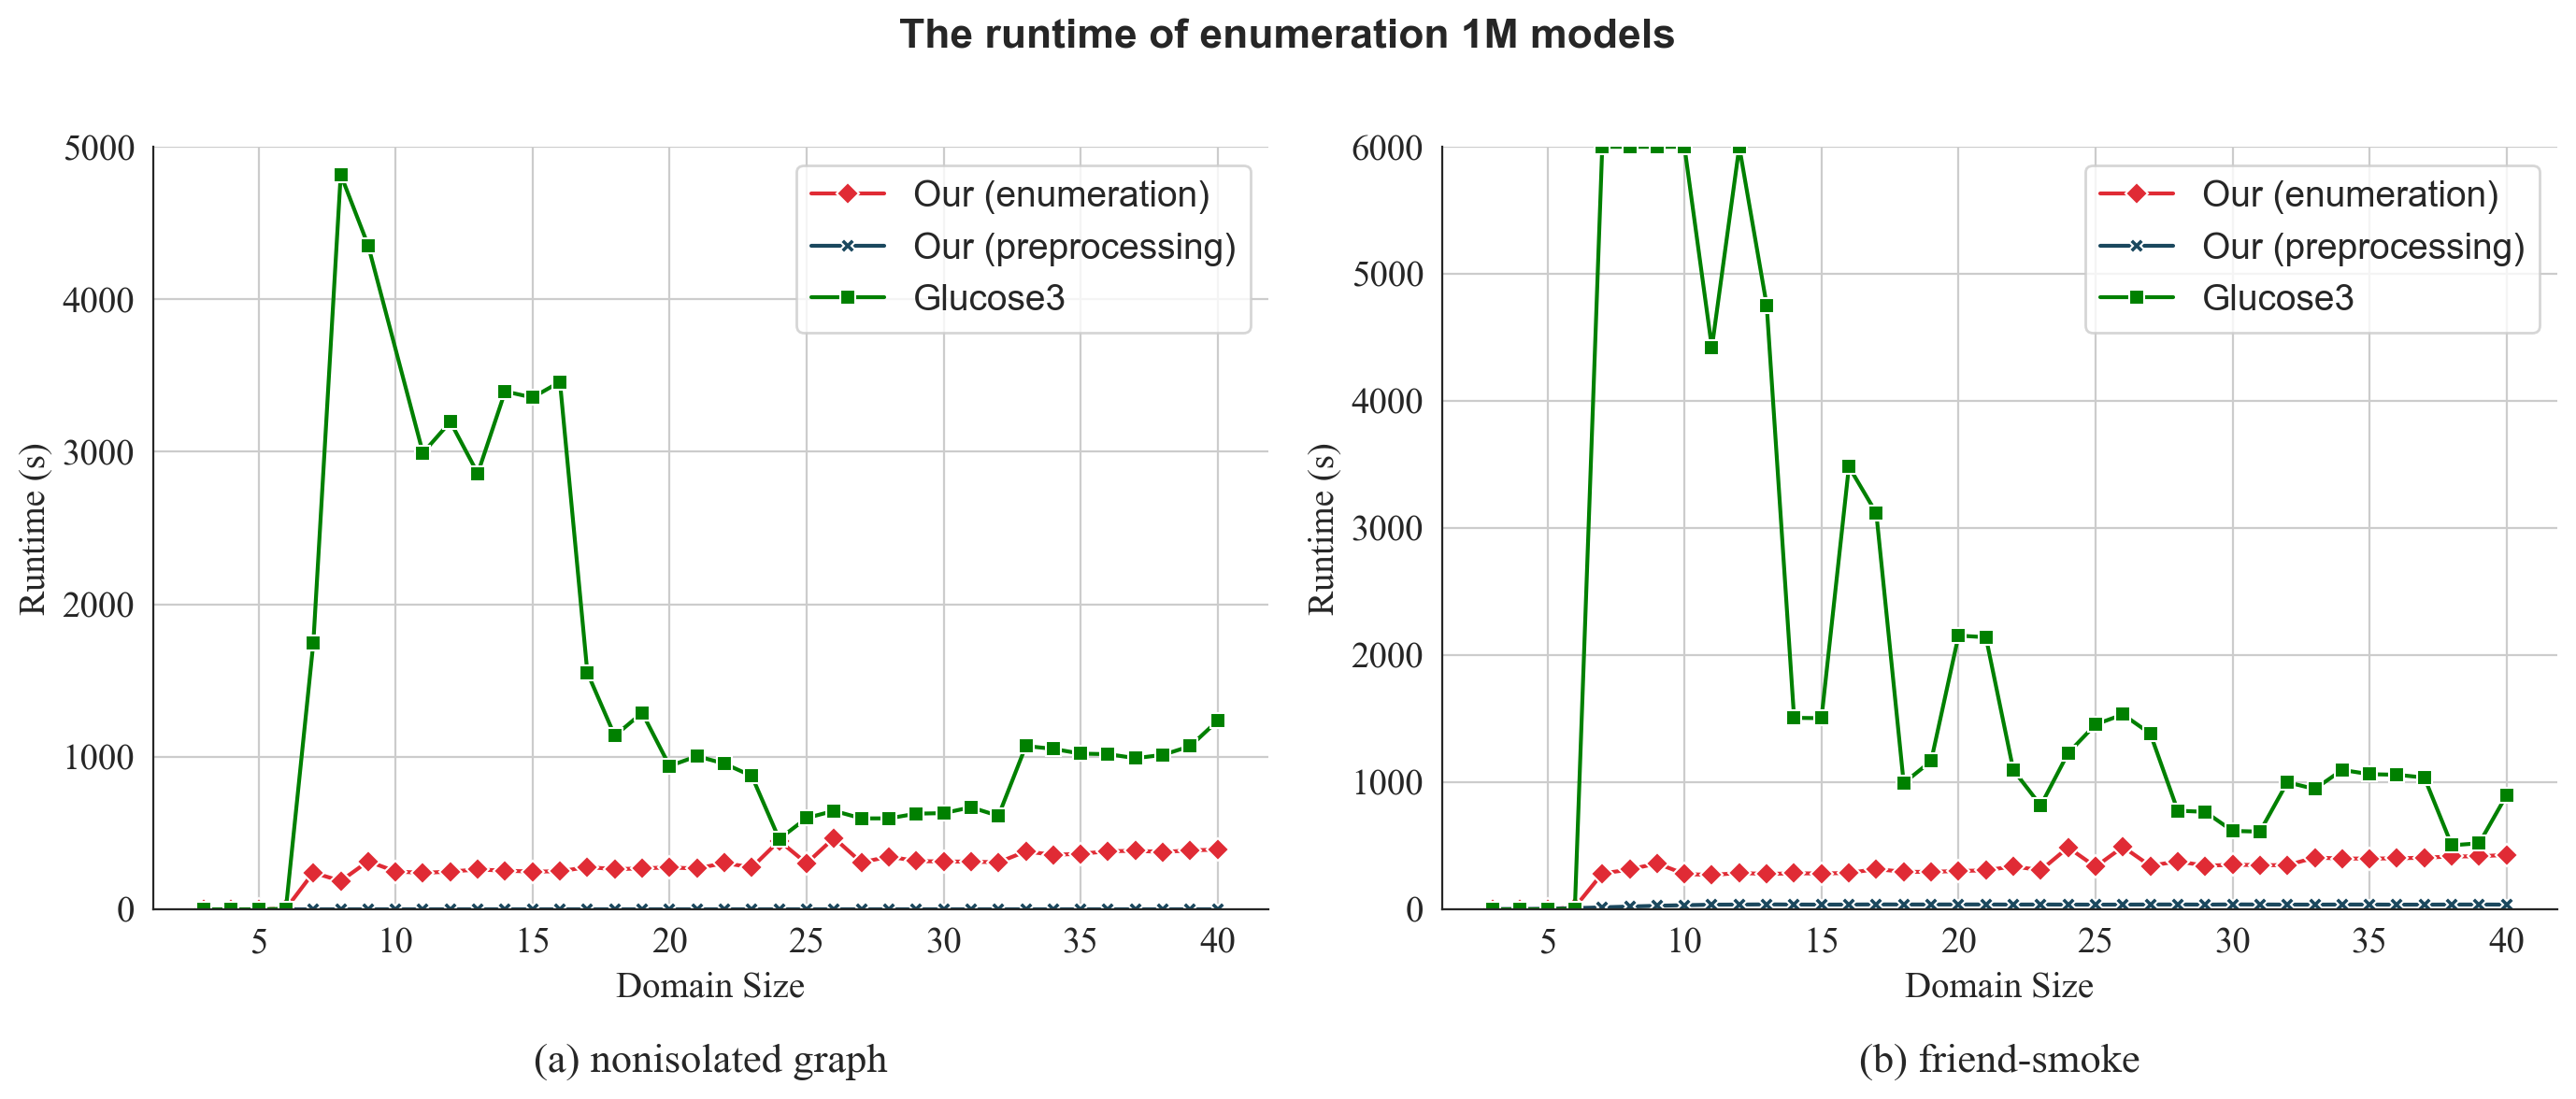

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties

# 设置全局字体
font = FontProperties(family='Times New Roman', size=14)

# 处理第一个数据集（fr-sm）
res_file_1_fr = "models/enum/friends-smokes.wfomcs.res"
res_file_2_fr = "models/enum/pysat-5-fr-sm-1m"
res_1_fr = pd.read_csv(res_file_1_fr, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2_fr = pd.read_csv(res_file_2_fr, header=None, names=['domain_size', 'model_cnt', 'runtime'])

# 处理数据（fr-sm）
df_1_fr = pd.DataFrame({
    'domain_size': res_1_fr['n'],
    'runtime': res_1_fr['t_enum'],
    't_pre': res_1_fr['t_pre']
}).query('domain_size <= 40')
df_2_fr = pd.DataFrame({
    'domain_size': res_2_fr['domain_size'],
    'runtime': res_2_fr['runtime']
}).query('domain_size <= 40')

# 处理第二个数据集（nonisolated_graph）
res_file_1_ng = "models/enum/nonisolated_graph.wfomcs.res"
res_file_2_ng = "models/enum/pysat-2-non-iso-1m"
res_1_ng = pd.read_csv(res_file_1_ng, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2_ng = pd.read_csv(res_file_2_ng, header=None, names=['domain_size', 'model_cnt', 'runtime'])

# 处理数据（nonisolated_graph）
df_1_ng = pd.DataFrame({
    'domain_size': res_1_ng['n'],
    'runtime': res_1_ng['t_enum'],
    't_pre': res_1_ng['t_pre']
}).query('domain_size <= 40')
df_2_ng = pd.DataFrame({
    'domain_size': res_2_ng['domain_size'],
    'runtime': res_2_ng['runtime']
}).query('domain_size <= 40')

# 创建子图
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14, 6), dpi=200)
sns.set_style("white")
fig.suptitle('The runtime of enumeration 1M models',
             y=1.00,  # 垂直位置微调
             fontsize=16, 
             fontweight='bold')


# 绘制第一个子图：fr-sm
sns.lineplot(data=df_1_fr, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)', ax=ax1)
sns.lineplot(data=df_1_fr, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)', ax=ax1)
sns.lineplot(data=df_2_fr, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3', ax=ax1)

# ax1.set_title('friend-smoke', fontproperties=font)
ax1.set_xticks([5, 10, 15, 20, 25, 30, 35, 40])
ax1.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40], fontproperties=font)
ax1.set_yticks([0, 1000, 2000, 3000, 4000, 5000, 6000])
ax1.set_yticklabels([0, 1000, 2000, 3000, 4000, 5000, 6000], fontproperties=font)
ax1.set_ylim(0, 6000)
ax1.set_xlabel('Domain Size', fontproperties=font)
ax1.set_ylabel('Runtime (s)', fontproperties=font)
ax1.grid(True)
sns.despine(ax=ax1)

# 绘制第二个子图：nonisolated_graph
sns.lineplot(data=df_1_ng, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)', ax=ax2)
sns.lineplot(data=df_1_ng, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)', ax=ax2)
sns.lineplot(data=df_2_ng, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3', ax=ax2)

# ax2.set_title('nonisolated graph', fontproperties=font)
ax2.set_xticks([5, 10, 15, 20, 25, 30, 35, 40])
ax2.set_xticklabels([5, 10, 15, 20, 25, 30, 35, 40], fontproperties=font)
ax2.set_yticks([0, 1000, 2000, 3000, 4000, 5000])
ax2.set_yticklabels([0, 1000, 2000, 3000, 4000, 5000], fontproperties=font)
ax2.set_ylim(0, 5000)
ax2.set_xlabel('Domain Size', fontproperties=font)
ax2.set_ylabel('Runtime (s)', fontproperties=font)
ax2.grid(True)
sns.despine(ax=ax2)


ax1.text(0.5, -0.2, '(b) friend-smoke', transform=ax1.transAxes, ha='center', va='center', fontproperties=font, fontsize=16)
ax2.text(0.5, -0.2, '(a) nonisolated graph', transform=ax2.transAxes, ha='center', va='center', fontproperties=font, fontsize=16)
# 添加统一图例并调整布局
# handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), prop=font, ncol=3)
plt.tight_layout()
# plt.subplots_adjust(bottom=0.25)  # 为图例留出空间

# 保存合并后的图表
plt.savefig("combined_results.pdf", bbox_inches='tight')

3-color

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

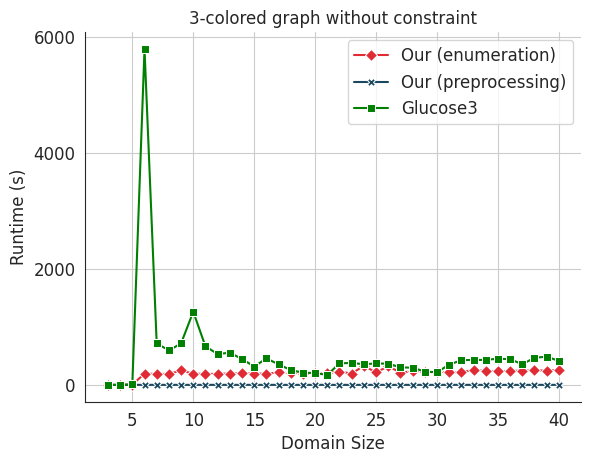

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file_1 = "/home/mengqiaolan/counting_fo2/models/enum/3-color.wfomcs.res"
res_file_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-1-3-color-1m"
res_1 = pd.read_csv(res_file_1, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2 = pd.read_csv(res_file_2, header=None, names=['domain_size', 'model_cnt', 'runtime'])

x_1 = np.array(res_1['n'])
x_2 = np.array(res_2['domain_size'])
y_1 = np.array(res_1['t_enum'])
y_2 = np.array(res_2['runtime'])
df_1 = pd.DataFrame({'domain_size': x_1, 'runtime': y_1, 't_pre': np.array(res_1['t_pre'])})
df_1 = df_1[df_1['domain_size'] <= 40]
df_2 = pd.DataFrame({'domain_size': x_2, 'runtime': y_2})
df_2 = df_2[df_2['domain_size'] <= 40]

sns.lineplot(data=df_1, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)')
sns.lineplot(data=df_1, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)')
sns.lineplot(data=df_2, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')

sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('3-colored graph without constraint', fontproperties=font)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], fontproperties=font)
plt.yticks([0, 2000, 4000, 6000], fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file_1 + ".pdf")

non-isolated

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

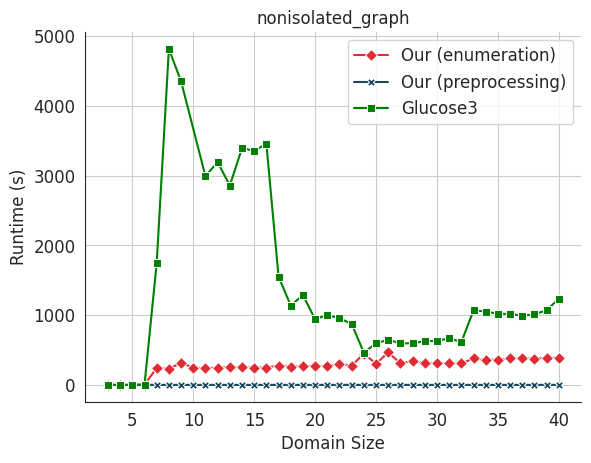

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file_1 = "/home/mengqiaolan/counting_fo2/models/enum/nonisolated_graph.wfomcs.res"
res_file_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-2-non-iso-1m"
res_1 = pd.read_csv(res_file_1, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2 = pd.read_csv(res_file_2, header=None, names=['domain_size', 'model_cnt', 'runtime'])

x_1 = np.array(res_1['n'])
x_2 = np.array(res_2['domain_size'])
y_1 = np.array(res_1['t_enum'])
y_2 = np.array(res_2['runtime'])
df_1 = pd.DataFrame({'domain_size': x_1, 'runtime': y_1, 't_pre': np.array(res_1['t_pre'])})
df_1 = df_1[df_1['domain_size'] <= 40]
df_2 = pd.DataFrame({'domain_size': x_2, 'runtime': y_2})
df_2 = df_2[df_2['domain_size'] <= 40]

sns.lineplot(data=df_1, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)')
sns.lineplot(data=df_1, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)')
sns.lineplot(data=df_2, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')

sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('nonisolated_graph', fontproperties=font)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], fontproperties=font)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000], fontproperties=font)
# plt.ylim(0, 6000)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file_1 + ".pdf")

non-isolated-3-color

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

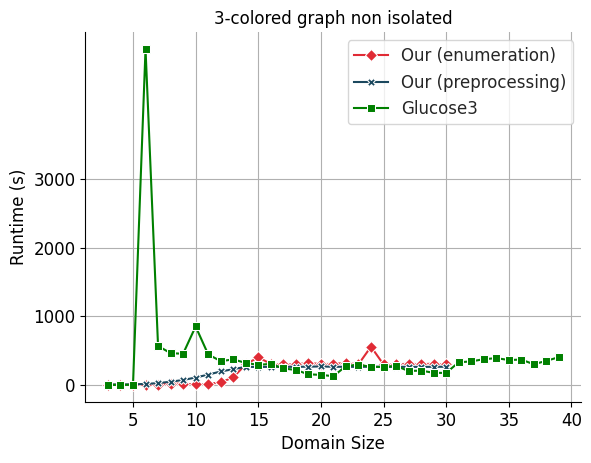

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file_1 = "/home/mengqiaolan/counting_fo2/models/enum/non-isolated-3-colored.wfomcs.res"
res_file_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-3-non-iso-3-color-1m"
res_1 = pd.read_csv(res_file_1, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2 = pd.read_csv(res_file_2, header=None, names=['domain_size', 'model_cnt', 'runtime'])

x_1 = np.array(res_1['n'])
x_2 = np.array(res_2['domain_size'])
y_1 = np.array(res_1['t_enum'])
y_2 = np.array(res_2['runtime'])
df_1 = pd.DataFrame({'domain_size': x_1, 'runtime': y_1, 't_pre': np.array(res_1['t_pre'])})
df_1 = df_1[df_1['domain_size'] <= 40]
df_2 = pd.DataFrame({'domain_size': x_2, 'runtime': y_2})
df_2 = df_2[df_2['domain_size'] <= 40]

sns.lineplot(data=df_1, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)')
sns.lineplot(data=df_1, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)')
sns.lineplot(data=df_2, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')

sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('3-colored graph non isolated', fontproperties=font)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], fontproperties=font)
plt.yticks([0, 1000, 2000, 3000], fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file_1 + ".pdf")

3-color-r

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

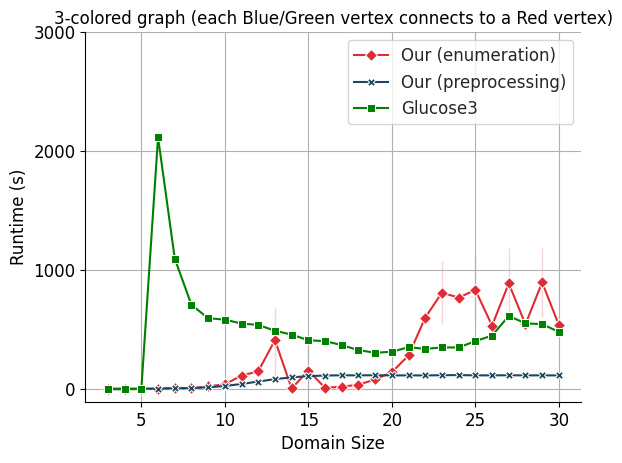

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file_1 = "/home/mengqiaolan/counting_fo2/models/enum/3-color-R.wfomcs.res"
res_file_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-4-3-color-r-1m"
res_1 = pd.read_csv(res_file_1, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2 = pd.read_csv(res_file_2, header=None, names=['domain_size', 'model_cnt', 'runtime'])

x_1 = np.array(res_1['n'])
x_2 = np.array(res_2['domain_size'])
y_1 = np.array(res_1['t_enum'])
y_2 = np.array(res_2['runtime'])
df_1 = pd.DataFrame({'domain_size': x_1, 'runtime': y_1, 't_pre': np.array(res_1['t_pre'])})
df_1 = df_1[df_1['domain_size'] <= 30]
df_2 = pd.DataFrame({'domain_size': x_2, 'runtime': y_2})
df_2 = df_2[df_2['domain_size'] <= 30] #OOM

sns.lineplot(data=df_1, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)')
sns.lineplot(data=df_1, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)')
sns.lineplot(data=df_2, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')

sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('3-colored graph (each Blue/Green vertex connects to a Red vertex)', fontproperties=font)
plt.xticks([5, 10, 15, 20, 25, 30], fontproperties=font)
plt.yticks([0, 1000, 2000, 3000], fontproperties=font)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file_1 + ".pdf")

fr-sm

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

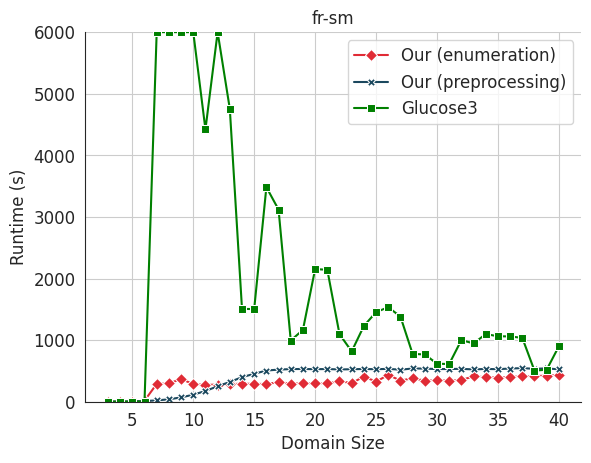

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_file_1 = "/home/mengqiaolan/counting_fo2/models/enum/friends-smokes.wfomcs.res"
res_file_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-5-fr-sm-1m"
res_1 = pd.read_csv(res_file_1, header=None, names=['n', 't_pre', 't_enum', 'num_meta','num_model', 'num_model_2', 'avg_time'])
res_2 = pd.read_csv(res_file_2, header=None, names=['domain_size', 'model_cnt', 'runtime'])

x_1 = np.array(res_1['n'])
x_2 = np.array(res_2['domain_size'])
y_1 = np.array(res_1['t_enum'])
y_2 = np.array(res_2['runtime'])
df_1 = pd.DataFrame({'domain_size': x_1, 'runtime': y_1, 't_pre': np.array(res_1['t_pre'])})
df_1 = df_1[df_1['domain_size'] <= 40]
df_2 = pd.DataFrame({'domain_size': x_2, 'runtime': y_2})
df_2 = df_2[df_2['domain_size'] <= 40]

sns.lineplot(data=df_1, x='domain_size', y='runtime', color='#e02b35', marker='D', label='Our (enumeration)')
sns.lineplot(data=df_1, x='domain_size', y='t_pre', color='#1b485e', marker='X', label='Our (preprocessing)')
sns.lineplot(data=df_2, x='domain_size', y='runtime', color='green', marker='s', label='Glucose3')

sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('fr-sm', fontproperties=font)
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], fontproperties=font)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000], fontproperties=font)
plt.ylim(0, 6000)
plt.xlabel('Domain Size', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file_1 + ".pdf")

delay

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

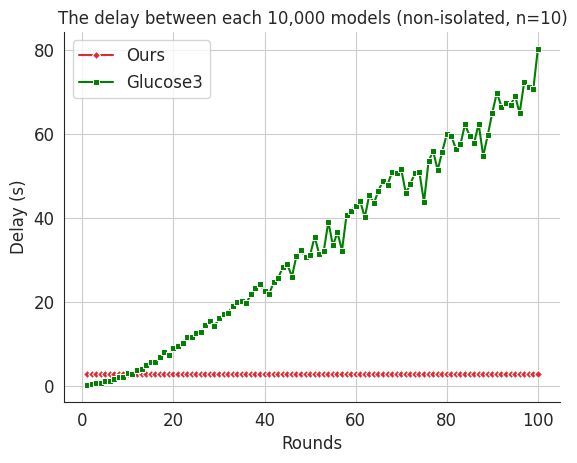

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_1 = "/home/mengqiaolan/counting_fo2/models/enum/noniso-delay"
res_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-non-iso-delay"
res_1 = pd.read_csv(res_1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
res_2 = pd.read_csv(res_2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])

x = np.array(res_1['i'])
y_1 = np.array(res_1['residual'])
y_2 = np.array(res_2['residual'])


df_1 = pd.DataFrame({'i': x, 'delay': y_1})
df_2 = pd.DataFrame({'i': x, 'delay': y_2})

# plt.figure(figsize=(12, 6))

sns.lineplot(data=df_1, x='i', y='delay', color='#e02b35', marker='D', markersize=4, label='Ours')
sns.lineplot(data=df_2, x='i', y='delay', color='green', marker='s', markersize=4, label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('The delay between each 10,000 models (non-isolated, n=10)', fontproperties=font)
plt.xticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.yticks([0, 20, 40, 60, 80], fontproperties=font)
plt.xlabel('Rounds', fontproperties=font)
plt.ylabel('Delay (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".delay.pdf")


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

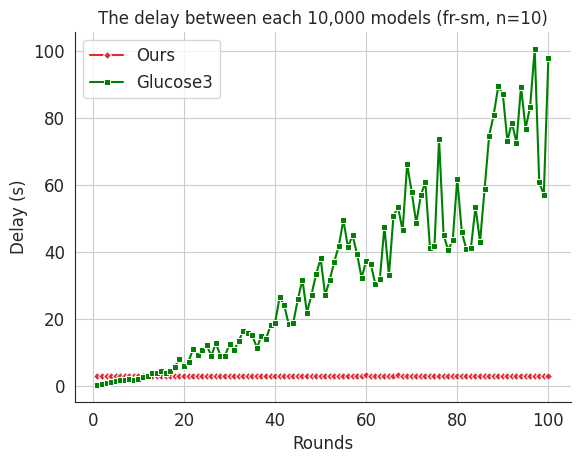

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_1 = "/home/mengqiaolan/counting_fo2/models/enum/fr-delay"
res_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-fr-sm-delay"
res_1 = pd.read_csv(res_1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
res_2 = pd.read_csv(res_2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])

x = np.array(res_1['i'])
y_1 = np.array(res_1['residual'])
y_2 = np.array(res_2['residual'])


df_1 = pd.DataFrame({'i': x, 'delay': y_1})
df_2 = pd.DataFrame({'i': x, 'delay': y_2})

# plt.figure(figsize=(12, 6))

sns.lineplot(data=df_1, x='i', y='delay', color='#e02b35', marker='D', markersize=4, label='Ours')
sns.lineplot(data=df_2, x='i', y='delay', color='green', marker='s', markersize=4, label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('The delay between each 10,000 models (fr-sm, n=10)', fontproperties=font)
plt.xticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.yticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.xlabel('Rounds', fontproperties=font)
plt.ylabel('Delay (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".delay.pdf")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.font_manager import FontProperties
font = FontProperties(family='Times New Roman', size=12)

res_1 = "/home/mengqiaolan/counting_fo2/models/enum/noniso-delay"
res_2 = "/home/mengqiaolan/counting_fo2/models/enum/pysat-non-iso-delay"
res_1 = pd.read_csv(res_1, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
res_2 = pd.read_csv(res_2, header=None, names=['i', 'model_cnt', 'total_time', 'residual'])
# print(res)

x = np.array(res_1['i'])
y_1 = np.array(res_1['total_time'])
y_2 = np.array(res_2['total_time'])


df_1 = pd.DataFrame({'i': x, 'runtime': y_1})
df_2 = pd.DataFrame({'i': x, 'runtime': y_2})

sns.lineplot(data=df_1, x='i', y='runtime', color='#e02b35', marker='D', markersize=4, label='Ours')
sns.lineplot(data=df_2, x='i', y='runtime', color='green', marker='s', markersize=4, label='Glucose3')


sns.set_style("white")
sns.despine(left=False, bottom=False)

plt.title('Runtime for enumerating the first k x 10^4 models', fontproperties=font)
plt.xticks([0, 20, 40, 60, 80, 100], fontproperties=font)
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], fontproperties=font)
plt.xlabel('k', fontproperties=font)
plt.ylabel('Runtime (s)', fontproperties=font)
# plt.legend(prop=font, ncol=3)
plt.legend(prop=font)

plt.grid(True)

plt.savefig(res_file + ".pdf")
